In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [3]:
# Will: ER Visits and visualization

total_er_visits = "Resources/total_er_visits.csv"
total_er_visits = pd.read_csv(total_er_visits)
total_er_df = pd.DataFrame(total_er_visits)
total_er_df = total_er_df.set_index('State')

total_er_df

,2010,2011,2012,2013,2014
State,,,,,
Arizona,2305413,2416553,2476208,2432305,2569082
Florida,8173500,8507584,9041333,9194744,9764626
Illinois,4955198,5140486,5305026,5092925,5245177
Iowa,1140898,1171011,1188770,1159998,1194712
Kentucky,2404944,2433143,2430001,2321513,2436880
Maryland,2408759,2498178,2619227,2530131,2527936
Minnesota,1801852,1876179,1789410,1749949,1865994
Nebraska,536858,538245,546455,551549,563255
North Carolina,4125701,5633259,4499568,4585990,4672977


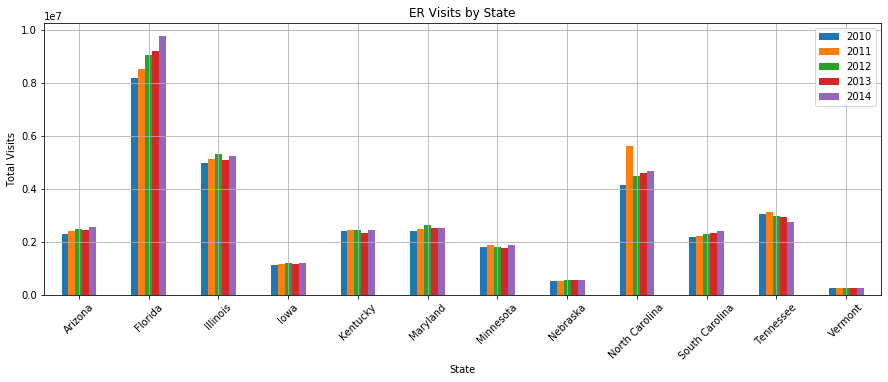

In [34]:
ax = total_er_df.plot.bar(rot=45, figsize=(15,5))
ax.set_title("ER Visits by State")
ax.set_ylabel("Total Visits")
ax.grid()

In [5]:
# Jaime:

#Read in excel file
df = pd.read_excel('Resources/hic04_acs.xls', skiprows = 3, index_col = [0,1])[:-6]
df

2018       Unnamed: 3 Unnamed: 4  \
Nation/State  Coverage                                                  
Nation/State  Coverage           Estimate  Margin of Error    Percent   
UNITED STATES Total                322249               15        100   
              Any coverage         293684              178       91.1   
              Uninsured             28566              183        8.9   
              Private              217623              404       67.5   
...                                   ...              ...        ...   
WYOMING       ..Direct-purchase        89                6       15.7   
              ..TRICARE                23                4        4.1   
              Public                  155                6       27.3   
              ..Medicaid               58                5       10.3   
              ..Medicare              102                3         18   

                                      Unnamed: 5      2017       Unnamed: 7  \
Nation/State  Coverage                                                        
Nation/State  Coverage           Margin of Error  Estimate  Margin of Error   
UNITED STATES Total                            Z    320775               15   
              Any coverage                   0.1    292756              184   
              Uninsured                      0.1     28019              188   
              Private                        0.1    216952              419   
...                                          ...       ...              ...   
WYOMING       ..Direct-purchase              1.1        89                5   
              ..TRICARE                      0.6        20                3   
              Public                           1       161                6   
              ..Medicaid                     0.9        69                6   
              ..Medicare                     0.4        98                2   

                                Unnamed: 8       Unnamed: 9      2016  \
Nation/State  Coverage                                                  
Nation/State  Coverage             Percent  Margin of Error  Estimate   
UNITED STATES Total                    100                Z    318176   
              Any coverage            91.3              0.1    290872   
              Uninsured                8.7              0.1     27304   
              Private                 67.6              0.1    215859   
...                                    ...              ...       ...   
WYOMING       ..Direct-purchase       15.6              0.9        94   
              ..TRICARE                3.6              0.6        19   
              Public                  28.3              1.1       157   
              ..Medicaid              12.2                1        70   
              ..Medicare              17.3              0.4        94   

                                     Unnamed: 11  ... Unnamed: 36  \
Nation/State  Coverage                            ...               
Nation/State  Coverage           Margin of Error  ...     Percent   
UNITED STATES Total                           15  ...         100   
              Any coverage                   158  ...        84.5   
              Uninsured                      162  ...        15.5   
              Private                        369  ...        65.8   
...                                          ...  ...         ...   
WYOMING       ..Direct-purchase                6  ...        13.4   
              ..TRICARE                        3  ...         3.7   
              Public                           5  ...          26   
              ..Medicaid                       5  ...        12.8   
              ..Medicare                       2  ...        13.3   

                                     Unnamed: 37      2009      Unnamed: 39  \
Nation/State  Coverage                                                        
Nation/State  Coverage           Margin of Error  Est

In [6]:
#Drop columns with names not needed for analysis, only estimates are needed
for name, series in df.iteritems():
    if "Unnamed" in str(name):
        df = df.drop(name, axis = 1)

#Drop columns with years not needed for analysis
for name, series in df.iteritems():
    if name not in years_list:
        df = df.drop(name, axis =1)

#Remove states not needed for analysis
for index, row in df.iterrows():
    state, coverage = index
    if state.lower().capitalize() not in states_list:
        df = df.drop(state, level = 'Nation/State')

#Change Nation/State to State
df

NameError: name 'years_list' is not defined

In [7]:
# df.to_csv('Resources/hic04_acs_CLEAN.csv')

In [8]:
# Heather and Jennifer: Mortality visuals using cleaned up mortality data

# Reading mortality csv
mortality_df = pd.read_csv('Resources/crudemortality.csv')

# Printing mortality csv
mortality_df

,STATE,2010,2011,2012,2013,2014
0,Arizona,731.6,747.4,755.8,761.6,765.6
1,Florida,924.4,910.5,916.0,924.0,934.8
2,Illinois,778.8,792.5,795.7,802.1,817.5
3,Iowa,910.8,919.6,922.9,936.1,939.5
4,Kentucky,967.5,975.4,996.1,994.6,1015.9
5,Maryland,750.4,748.6,754.9,769.3,767.5
6,Minnesota,734.8,744.6,743.7,755.9,759.5
7,Nebraska,830.7,840.1,843.9,842.9,849.2
8,North Carolina,826.1,827.7,840.4,846.1,858.5
9,South Carolina,899.7,900.3,914.7,934.3,940.6


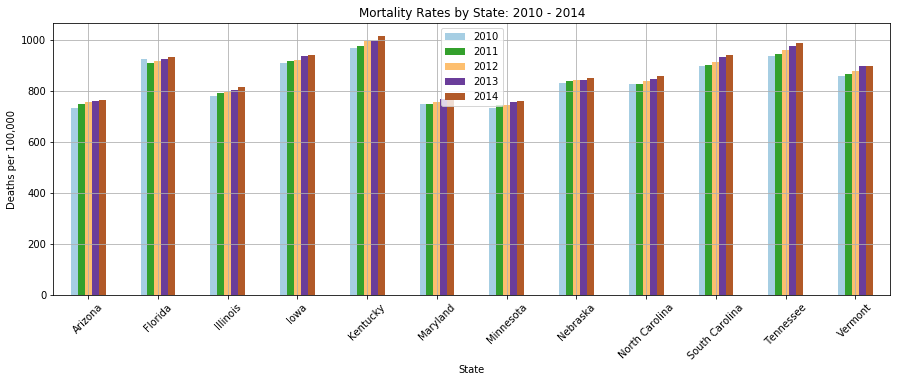

In [33]:
# Using a bar chart to better visualize the mortality rate per 100,000 by state for each year

#mortality_df = mortality_df.set_index('STATE')

ax = mortality_df.plot.bar(figsize=(15,5), colormap = 'Paired')
ax.set_title('Mortality Rates by State: 2010 - 2014')
ax.set_ylabel('Deaths per 100,000')
ax.set_xlabel('State')
plt.xticks(rotation = 45)
plt.legend(loc = 'best')
ax.grid()

In [20]:
df = pd.read_csv('Resources/hic04_acs_CLEAN.csv')
df = df.rename(columns = {'Nation/State': 'State'})
insured = df[df['Coverage'] == 'Any coverage']
insured = insured.drop(['Coverage'], axis =1)
insured = insured.set_index('State')
insured = insured * 1000
insured.to_csv('Resources/dataframe_insured.csv')
insured

,2010,2011,2012,2013,2014
State,,,,,
ARIZONA,5245000,5283000,5313000,5403000,5720000
FLORIDA,14593000,14841000,15195000,15392000,16338000
ILLINOIS,10928000,11029000,11076000,11086000,11464000
IOWA,2725000,2748000,2775000,2798000,2874000
KENTUCKY,3596000,3666000,3697000,3696000,3962000
MARYLAND,5047000,5138000,5191000,5241000,5423000
MINNESOTA,4776000,4819000,4895000,4923000,5081000
NEBRASKA,1594000,1607000,1621000,1632000,1674000
NORTH CAROLINA,7791000,7916000,7970000,8136000,8476000


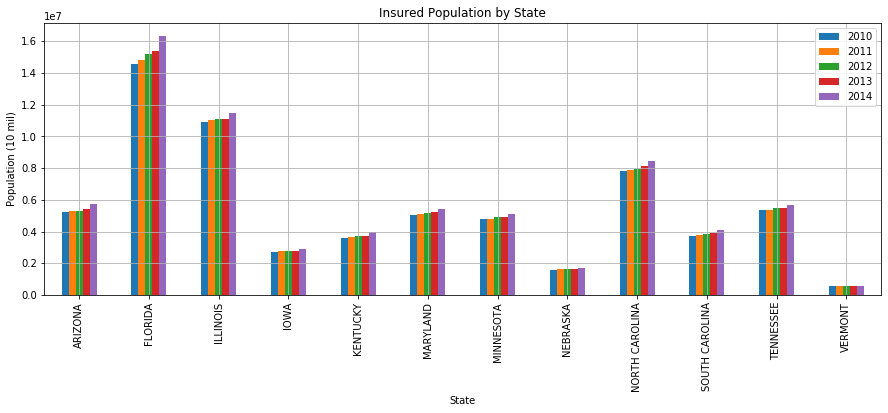

In [35]:
ax = insured.plot.bar(figsize = (15, 5))
ax.set_title("Insured Population by State")
ax.set_ylabel("Population (10 mil)")
ax.grid()

In [22]:
uninsured = df[df['Coverage'] == 'Uninsured']
uninsured = uninsured.drop(['Coverage'], axis = 1)
uninsured = uninsured.set_index('State')
uninsured = uninsured * 1000
uninsured.to_csv('Resources/dataframe_uninsured.csv')
uninsured

,2010,2011,2012,2013,2014
State,,,,,
ARIZONA,1065000,1095000,1131000,1118000,903000
FLORIDA,3941000,3911000,3816000,3853000,3245000
ILLINOIS,1746000,1659000,1622000,1618000,1238000
IOWA,280000,269000,254000,248000,189000
KENTUCKY,647000,618000,595000,616000,366000
MARYLAND,641000,598000,598000,593000,463000
MINNESOTA,476000,467000,425000,440000,317000
NEBRASKA,208000,207000,206000,209000,179000
NORTH CAROLINA,1570000,1545000,1582000,1509000,1276000


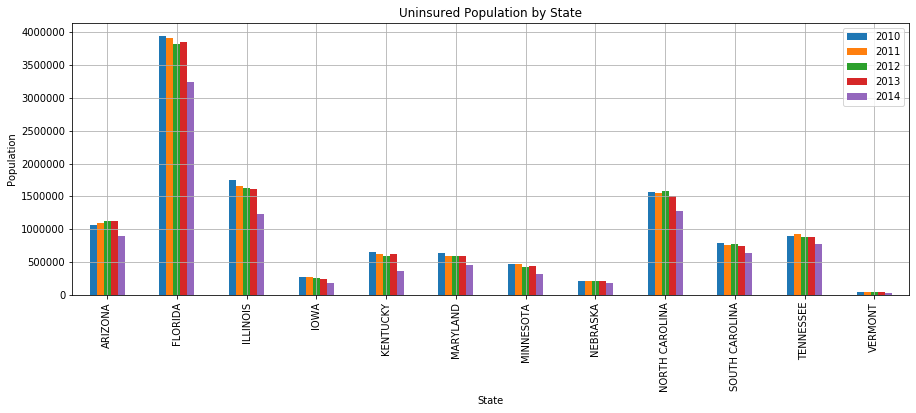

In [36]:
ax = uninsured.plot.bar(figsize = (15, 5))
ax.set_title("Uninsured Population by State")
ax.set_ylabel("Population")
ax.grid()

In [24]:
total_pop = df[df['Coverage'] == 'Total']
total_pop = total_pop.drop(['Coverage'], axis =1)
total_pop = total_pop.set_index('State')
total_pop = total_pop * 1000
total_pop

,2010,2011,2012,2013,2014
State,,,,,
ARIZONA,6310000,6378000,6444000,6521000,6623000
FLORIDA,18534000,18752000,19011000,19245000,19583000
ILLINOIS,12673000,12688000,12698000,12705000,12702000
IOWA,3005000,3017000,3029000,3045000,3063000
KENTUCKY,4243000,4284000,4293000,4312000,4329000
MARYLAND,5688000,5737000,5788000,5834000,5886000
MINNESOTA,5252000,5287000,5320000,5363000,5398000
NEBRASKA,1802000,1814000,1827000,1841000,1854000
NORTH CAROLINA,9361000,9461000,9553000,9645000,9752000


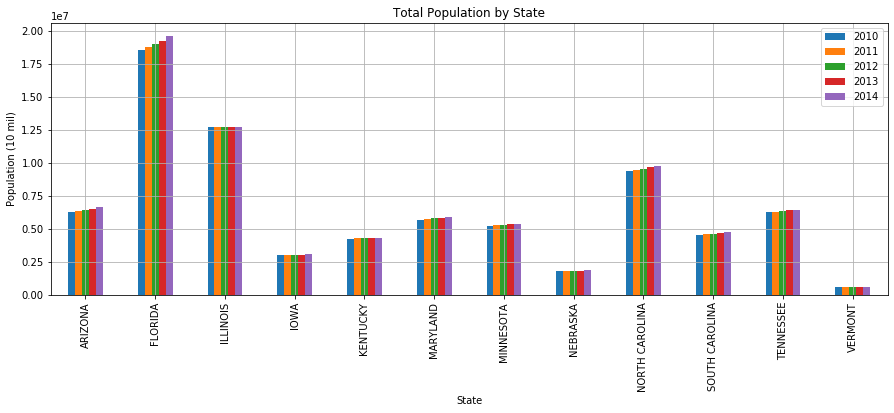

In [37]:
ax = total_pop.plot.bar(figsize = (15, 5))
ax.set_title("Total Population by State")
ax.set_ylabel("Population (10 mil)")
ax.grid()

In [26]:
percent_insured = 100 * insured / total_pop
percent_insured

,2010,2011,2012,2013,2014
State,,,,,
ARIZONA,83.122029,82.831609,82.448790,82.855390,86.365695
FLORIDA,78.736376,79.143558,79.927410,79.979215,83.429505
ILLINOIS,86.230569,86.924653,87.226335,87.256985,90.253503
IOWA,90.682196,91.083858,91.614394,91.888342,93.829579
KENTUCKY,84.751355,85.574230,86.116935,85.714286,91.522292
MARYLAND,88.730661,89.559003,89.685556,89.835447,92.133877
MINNESOTA,90.936786,91.148099,92.011278,91.795637,94.127455
NEBRASKA,88.457270,88.588754,88.724685,88.647474,90.291262
NORTH CAROLINA,83.228288,83.669802,83.429289,84.354588,86.915505


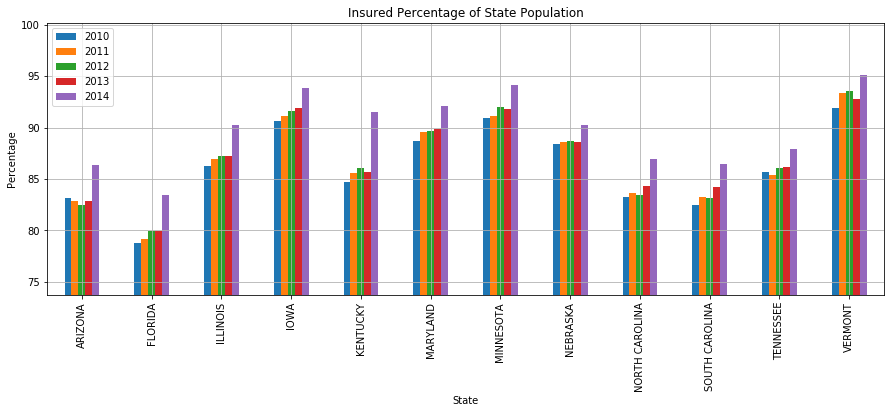

In [38]:
ax = percent_insured.plot.bar(figsize = (15, 5))
ax.set_ylim(percent_insured.min().min() - 5, percent_insured.max().max() + 5)
ax.set_title("Insured Percentage of State Population")
ax.set_ylabel("Percentage")
ax.grid()

In [28]:
percent_uninsured = 100 * uninsured / total_pop
percent_uninsured

,2010,2011,2012,2013,2014
State,,,,,
ARIZONA,16.877971,17.168391,17.551210,17.144610,13.634305
FLORIDA,21.263624,20.856442,20.072590,20.020785,16.570495
ILLINOIS,13.777322,13.075347,12.773665,12.735144,9.746497
IOWA,9.317804,8.916142,8.385606,8.144499,6.170421
KENTUCKY,15.248645,14.425770,13.859772,14.285714,8.454608
MARYLAND,11.269339,10.423566,10.331721,10.164553,7.866123
MINNESOTA,9.063214,8.832987,7.988722,8.204363,5.872545
NEBRASKA,11.542730,11.411246,11.275315,11.352526,9.654800
NORTH CAROLINA,16.771712,16.330198,16.560243,15.645412,13.084495


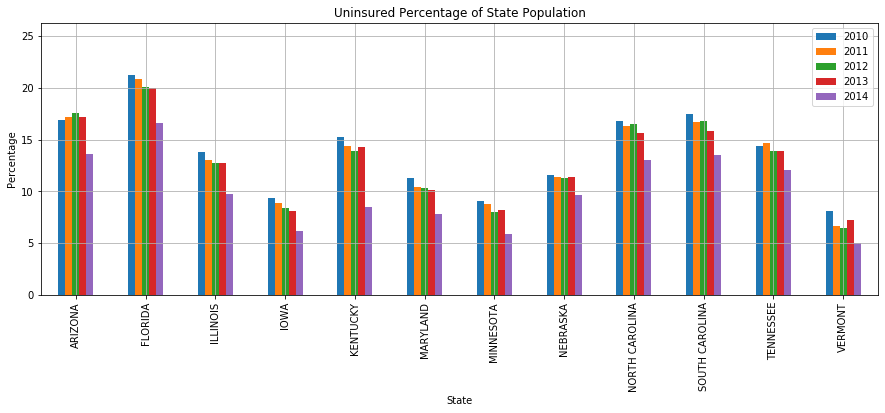

In [39]:
ax = percent_uninsured.plot.bar(figsize = (15, 5))
ax.set_ylim(percent_uninsured.min().min() - 5, percent_uninsured.max().max() + 5)
ax.set_title("Uninsured Percentage of State Population")
ax.set_ylabel("Percentage")
ax.grid()

In [40]:
total_er_visits = "Resources/total_er_visits.csv"
total_er_visits = pd.read_csv(total_er_visits)
total_er_df = pd.DataFrame(total_er_visits)
total_er_df = total_er_df.set_index('State')

total_er_df

,2010,2011,2012,2013,2014
State,,,,,
Arizona,2305413,2416553,2476208,2432305,2569082
Florida,8173500,8507584,9041333,9194744,9764626
Illinois,4955198,5140486,5305026,5092925,5245177
Iowa,1140898,1171011,1188770,1159998,1194712
Kentucky,2404944,2433143,2430001,2321513,2436880
Maryland,2408759,2498178,2619227,2530131,2527936
Minnesota,1801852,1876179,1789410,1749949,1865994
Nebraska,536858,538245,546455,551549,563255
North Carolina,4125701,5633259,4499568,4585990,4672977


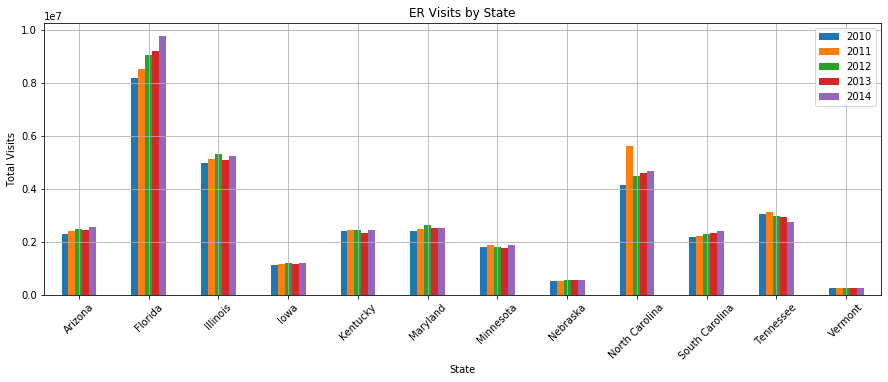

In [41]:
ax = total_er_df.plot.bar(rot=45, figsize=(15,5))
ax.set_title("ER Visits by State")
ax.set_ylabel("Total Visits")
ax.grid()